<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250730_Python_ML_Class10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
# [[x_train, y_train], [x_test, y_test]] list中的list
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()


In [ ]:
# 看到array: numpy array
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [ ]:
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

frog


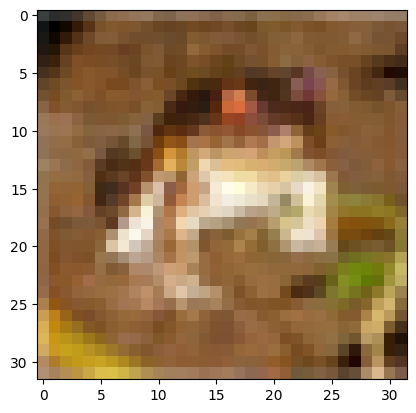

In [ ]:
import matplotlib.pyplot as plt
print(trans[y_train[0]])
plt.imshow(x_train[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D

layers = [
    # 64種過濾方式, (3x3)的長寬組合, padding
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # Dense(128, activation="relu"), # 圖片不複雜時, 選小模型就好, 不需要多層、那麼多參數
    Dense(10, activation="sigmoid")
]

model = Sequential(layers)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,106 (5.94 MB)

 Trainable params: 1,556,106 (5.94 MB)

 Non-trainable params: 0 (0.00 B)

```
GlobalAveragePooling2D:
特定範圍取平均值作為代表
```



In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss = CategoricalCrossentropy(), metrics = ["accuracy"])

In [ ]:
# 5 -> 0 0 0 0 0 1 0 0 0 0 (換成one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)
print(y_train[0])
print(y_train_cat[0])


6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# 攤平
x_train_norm = x_train / 255.0 # 除255可將偏差過大的值拉回來
x_test_norm = x_test / 255.0


In [ ]:
# 250730 新增自動訓練/儲存點
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    EarlyStopping(patience = 5),
    ModelCheckpoint("mnist.keras", save_best_only = True)
    # ModelCheckpoint("mnist.h5", save_best_only = True)
]

model.fit(x = x_train_norm,
          y = y_train_cat,
          batch_size = 100,
          epochs = 100,
          validation_split = 0.1,
          callbacks = c) # 真實訓練: 54000筆(60000 - 6000)


Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2479 - loss: 2.0250 - val_accuracy: 0.4894 - val_loss: 1.3863
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4960 - loss: 1.3938 - val_accuracy: 0.5406 - val_loss: 1.2859
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6110 - loss: 1.1013 - val_accuracy: 0.6586 - val_loss: 0.9463
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6907 - loss: 0.8814 - val_accuracy: 0.7494 - val_loss: 0.7411
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7447 - loss: 0.7323 - val_accuracy: 0.6924 - val_loss: 0.8934
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7832 - loss: 0.6216 - val_accuracy: 0.7784 - val_loss: 0.6527
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8229 - loss: 0.5093 - val_accuracy: 0.7636 - val_loss: 0.7171
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8517 - loss: 0.42

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7701 - loss: 0.8773


[0.8714209198951721, 0.7699999809265137]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)


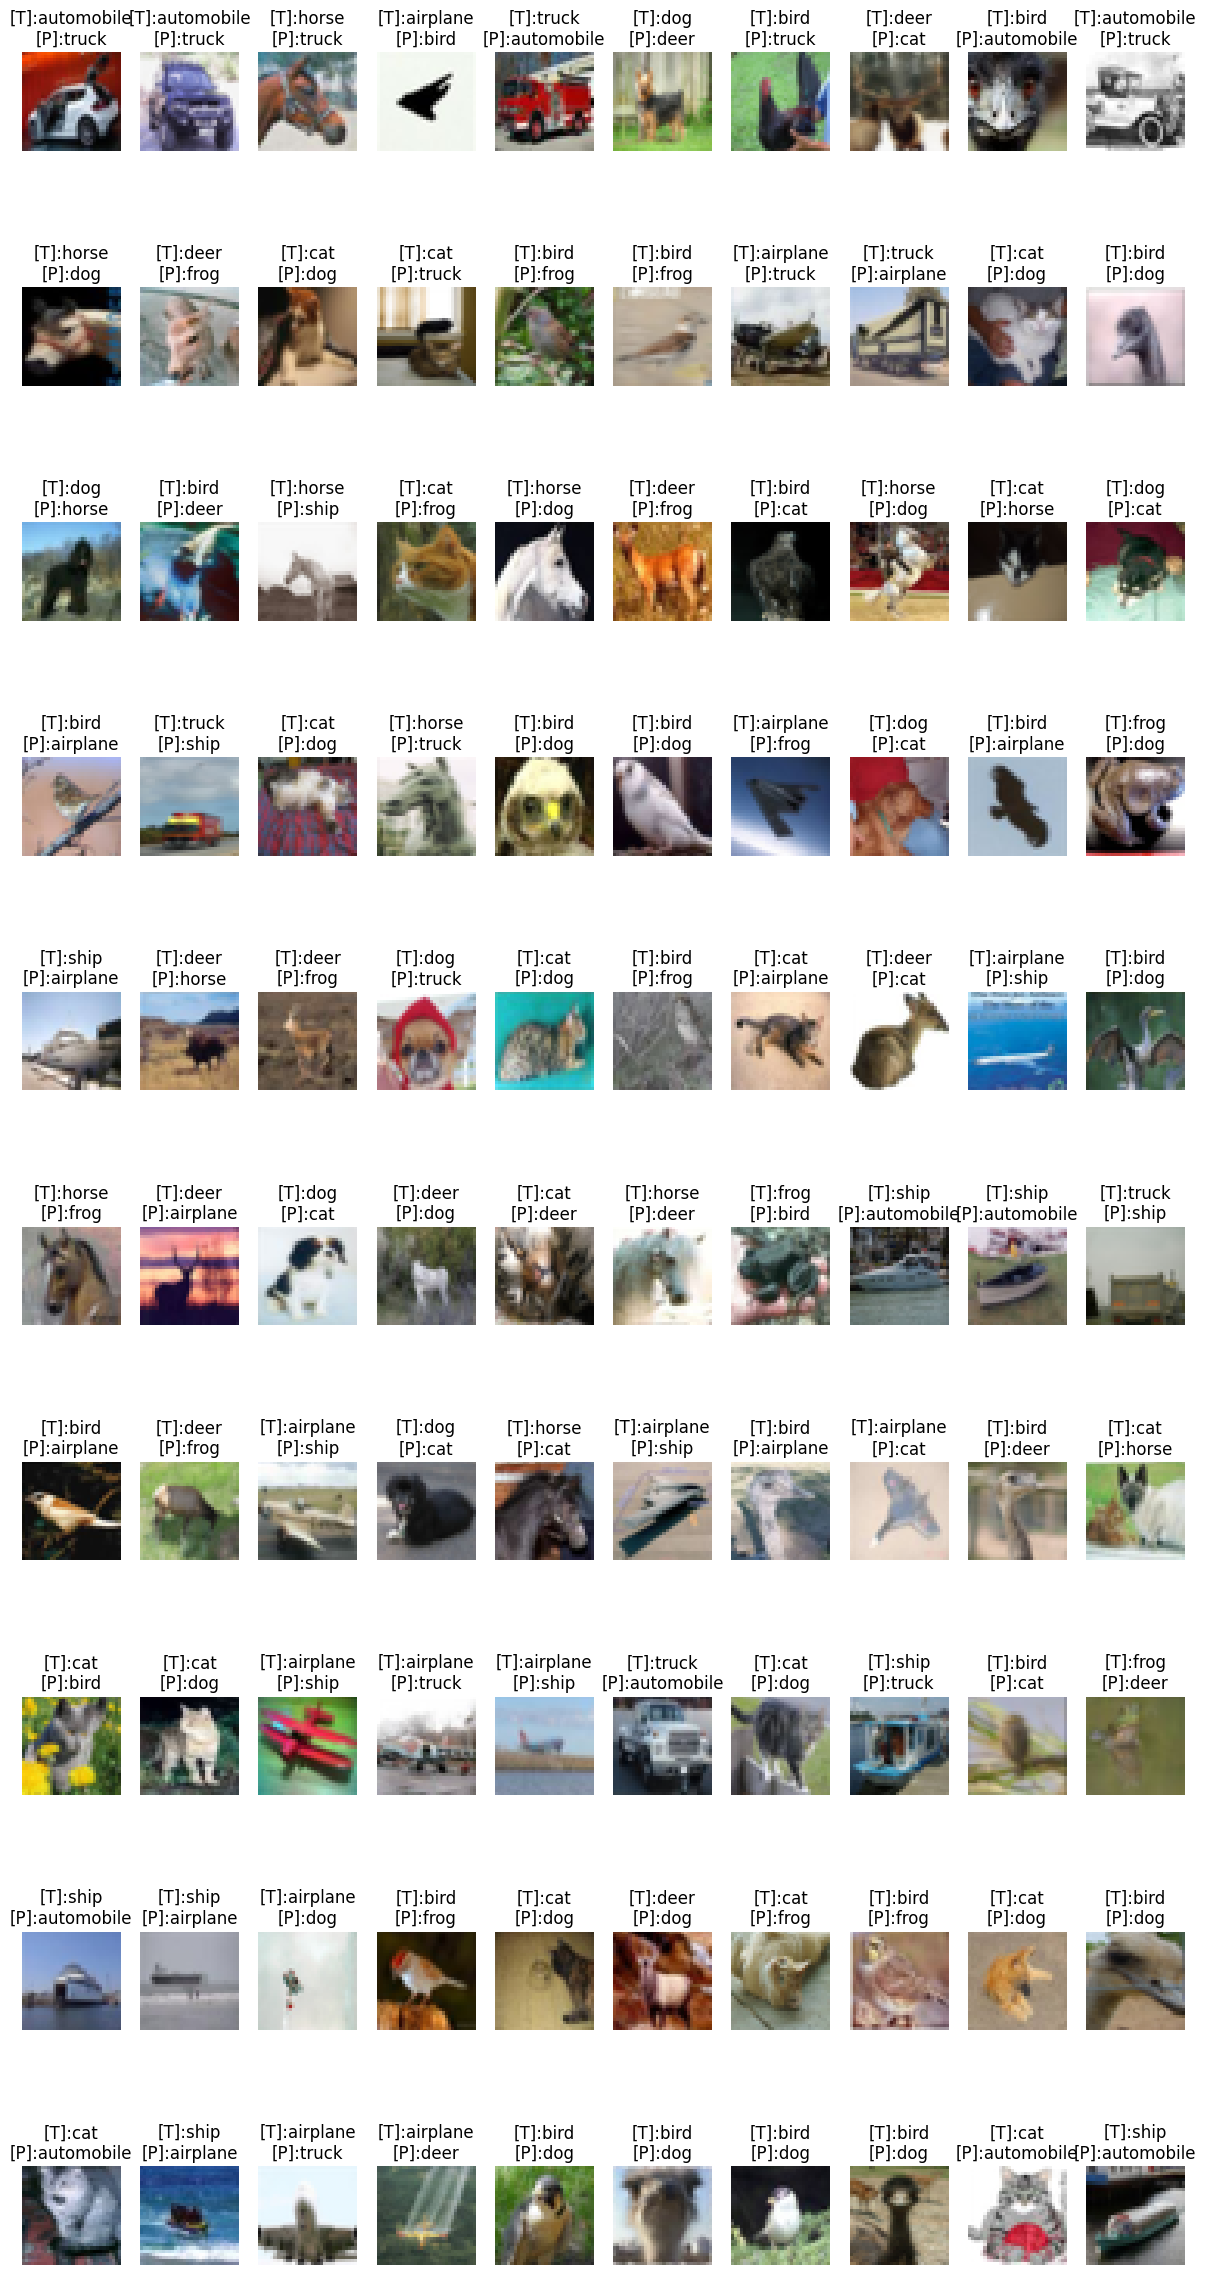

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pre = model.predict(x_test_norm).argmax(axis = -1) # -1象徵最後一個軸
print(pre.shape)

neq_idx = np.nonzero(pre != y_test)[0] # 為了把資料從tuple拿出來, 加上[0]
neq_idx_chosen = neq_idx[:100]
neq_x = x_test[neq_idx_chosen]
neq_pre = pre[neq_idx_chosen]
neq_true = y_test[neq_idx_chosen]

plt.figure(figsize = [15, 30])
for i in range(len(neq_idx_chosen)):
    plt.subplot(10, 10, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[neq_true[i]], trans[neq_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(neq_x[i])

```
鴕鳥頭被當成汽車?
-> 調整訓練資料, 給予更多只有鳥頭的圖片
-> 模型才能判別是鳥
```

